In [29]:
import numpy as np
from matplotlib import pyplot as plt

from PhotoData import MPI_Mainz, phidrates

from xs_tools import check_consistency
check_consistency()

from ruamel.yaml import YAML
yaml = YAML(typ='safe')

xs_metadata.yaml is consistent with the data files.


In [37]:
from ruamel.yaml import YAML
yaml = YAML()

In [155]:
fil = open('xs_metadata.yaml','r')
meta_data = yaml.load(fil)
fil.close()

In [156]:
spec = 'H2O'

# get the xs in folders
fil = open(spec+'/'+spec+'_xs.txt','r')
lines = fil.readlines()
fil.close()

photochem = {}
photochem['wavelength'] = np.array([])
photochem['xs'] = np.array([])
for line in lines[2:]:
    photochem['wavelength'] = np.append(photochem['wavelength'], float(line.split()[0]))
    photochem['xs'] = np.append(photochem['xs'], float(line.split()[1]))

In [157]:
fil = open('H2O_Ranjan(2020)_292K_192.057-230.413nm(extrapolated).txt','r')
lines = fil.readlines()
fil.close()

out = {}
out['wavelength'] = np.array([])
out['xs'] = np.array([])
for line in lines:
    out['wavelength'] = np.append(out['wavelength'], float(line.split()[0]))
    out['xs'] = np.append(out['xs'], float(line.split()[1]))

In [ ]:
# build ranjan into the xsection

In [213]:
start = np.min(out['wavelength'])
end = np.max(out['wavelength'])

wv_out = np.linspace(start,end,50)
xs_out = np.interp(wv_out,out['wavelength'],out['xs'])

In [219]:
end

230.413

In [215]:
new_wv = np.append(np.append(photochem['wavelength'][:-2],wv_out),[end+1e-4,photochem['wavelength'][-1]])
new_xs = np.append(np.append(photochem['xs'][:-2],xs_out),[0,0])

In [212]:
len(wv_out)

50

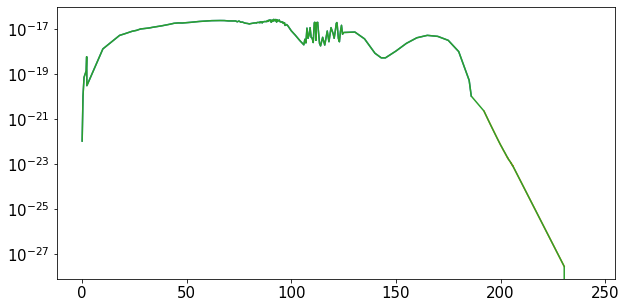

In [216]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize = [10,5])

ax.plot(photochem['wavelength'][:-2],photochem['xs'][:-2])
ax.plot(out['wavelength'],out['xs'])
# ax.plot(new_wv,new_xs)

ax.set_yscale('log')
# ax.set_

plt.show()

In [217]:
fil = open('H2O_xs_new.txt','w')

for i in range(len(new_wv)):

    fil.write('{:20}'.format('%.8e'%new_wv[i]))
    fil.write('{:20}'.format('%.8e'%new_xs[i])+'\n')

fil.close()